# Modeling: Linear Regression for infections and beds

Here I'll try to create a model that predicts new infections from vaccinations.

**Spoiler:** The model won't work and it has a very low score. Fortunately, this is not the purpose of this project. Now, you can go to the next notebook to see the clustering model.

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

References:

* https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [ ]:
#Machine Learning libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

In [ ]:
df_unified = pd.read_csv('/work/covid-19_ecuador/data/interim/df_unified.csv')

In [ ]:
df_unified

,nuevas,dosis_total_diff,primera_dosis_diff,segunda_dosis_diff,refuerzo_diff,(MSP) UCI Porcentaje Ocupadas,(RPIS) UCI Porcentaje Ocupadas,(RPC) UCI Porcentaje Ocupadas
0,23.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,21.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,53.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
631,677.0,0.0,0.0,0.0,0.0,52.0,67.0,23.0
632,677.0,0.0,0.0,0.0,0.0,50.0,68.0,21.0
633,677.0,0.0,0.0,0.0,0.0,55.0,69.0,20.0
634,677.0,0.0,0.0,0.0,0.0,61.0,71.0,19.0


In [ ]:
df_unified.columns

Index(['nuevas', 'dosis_total_diff', 'primera_dosis_diff',
       'segunda_dosis_diff', 'refuerzo_diff', '(MSP) UCI Porcentaje Ocupadas',
       '(RPIS) UCI Porcentaje Ocupadas', '(RPC) UCI Porcentaje Ocupadas'],
      dtype='object')

In [ ]:
df_unified.drop(columns=['(MSP) UCI Porcentaje Ocupadas', 
'(RPIS) UCI Porcentaje Ocupadas',
'(RPC) UCI Porcentaje Ocupadas'], inplace=True)

In [ ]:
sns.set_theme()

In [ ]:
df_unified.shape

(636, 5)

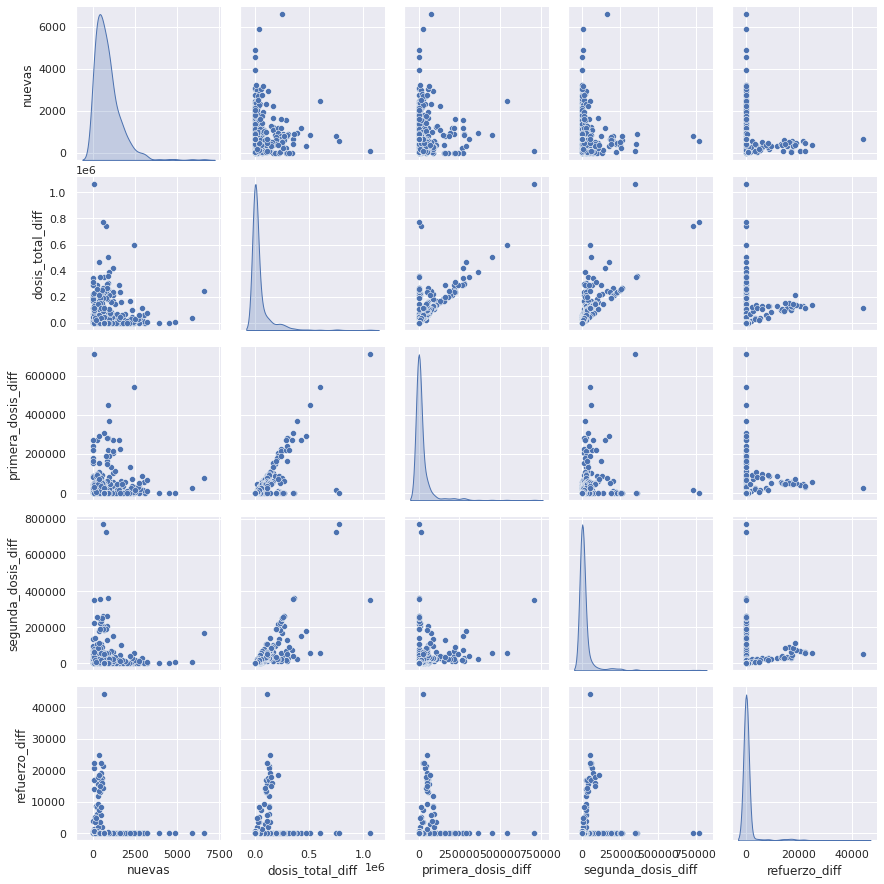

In [ ]:
sns.pairplot(df_unified, diag_kind='kde')

<AxesSubplot:>

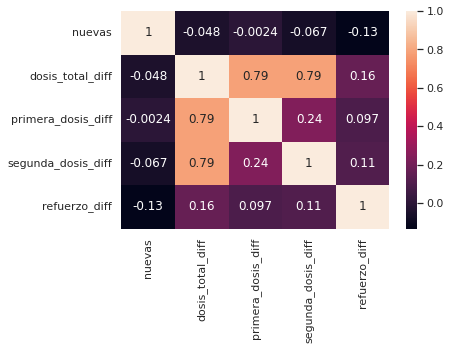

In [ ]:
sns.heatmap(df_unified.corr(), annot=True)

## Transformation/normalization

In [ ]:
#Power transformation
pt = PowerTransformer(method='yeo-johnson')
df_unified_yeo_johnson = pt.fit_transform(df_unified)


In [ ]:
df_unified_yeo_johnson

array([[-1.88899447, -0.74318408, -0.70288725, -0.71484955, -0.27559678],
       [-2.19439358, -0.74318408, -0.70288725, -0.71484955, -0.27559678],
       [-2.06182971, -0.74318408, -0.70288725, -0.71484955, -0.27559678],
       ...,
       [ 0.03356159, -0.74318408, -0.70288725, -0.71484955, -0.27559678],
       [ 0.03356159, -0.74318408, -0.70288725, -0.71484955, -0.27559678],
       [ 0.03356159, -0.74318408, -0.70288725, -0.71484955, -0.27559678]])

In [ ]:
y = df_unified_yeo_johnson[:, 0]
x = df_unified_yeo_johnson[:, 1::]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#Creating the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train) 

LinearRegression()

In [ ]:
regressor.score(X_test, Y_test)


0.06785766152450434

Without scaling

In [ ]:
yy = df_unified.iloc[:, 0].values
xx = df_unified.iloc[:, 1::].values

In [ ]:
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.2, random_state=0)

In [ ]:
#Creating the model
regressor = LinearRegression()
regressor.fit(X_train, Y_train) 

LinearRegression()

In [ ]:
regressor.score(XX_test, YY_test)


-1794.7133222299685

In [ ]:
5

5

In [ ]:
df_icu_unified = pd.read_csv('/work/covid-19_ecuador/data/interim/df_icu_unified.csv') 

In [ ]:
df_icu_unified

,nuevas,dosis_total_diff,primera_dosis_diff,segunda_dosis_diff,refuerzo_diff,(MSP) UCI Porcentaje Ocupadas,(RPIS) UCI Porcentaje Ocupadas,(RPC) UCI Porcentaje Ocupadas
0,1034.0,79378.0,44241.0,35137.0,0.0,0.0,0.0,0.0
1,1619.0,44004.0,0.0,44004.0,0.0,0.0,0.0,0.0
2,985.0,105820.0,83629.0,22191.0,0.0,0.0,0.0,0.0
3,0.0,65789.0,43880.0,21909.0,0.0,0.0,0.0,0.0
4,507.0,129679.0,99222.0,30457.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
156,677.0,0.0,0.0,0.0,0.0,52.0,67.0,23.0
157,677.0,0.0,0.0,0.0,0.0,50.0,68.0,21.0
158,677.0,0.0,0.0,0.0,0.0,55.0,69.0,20.0
159,677.0,0.0,0.0,0.0,0.0,61.0,71.0,19.0


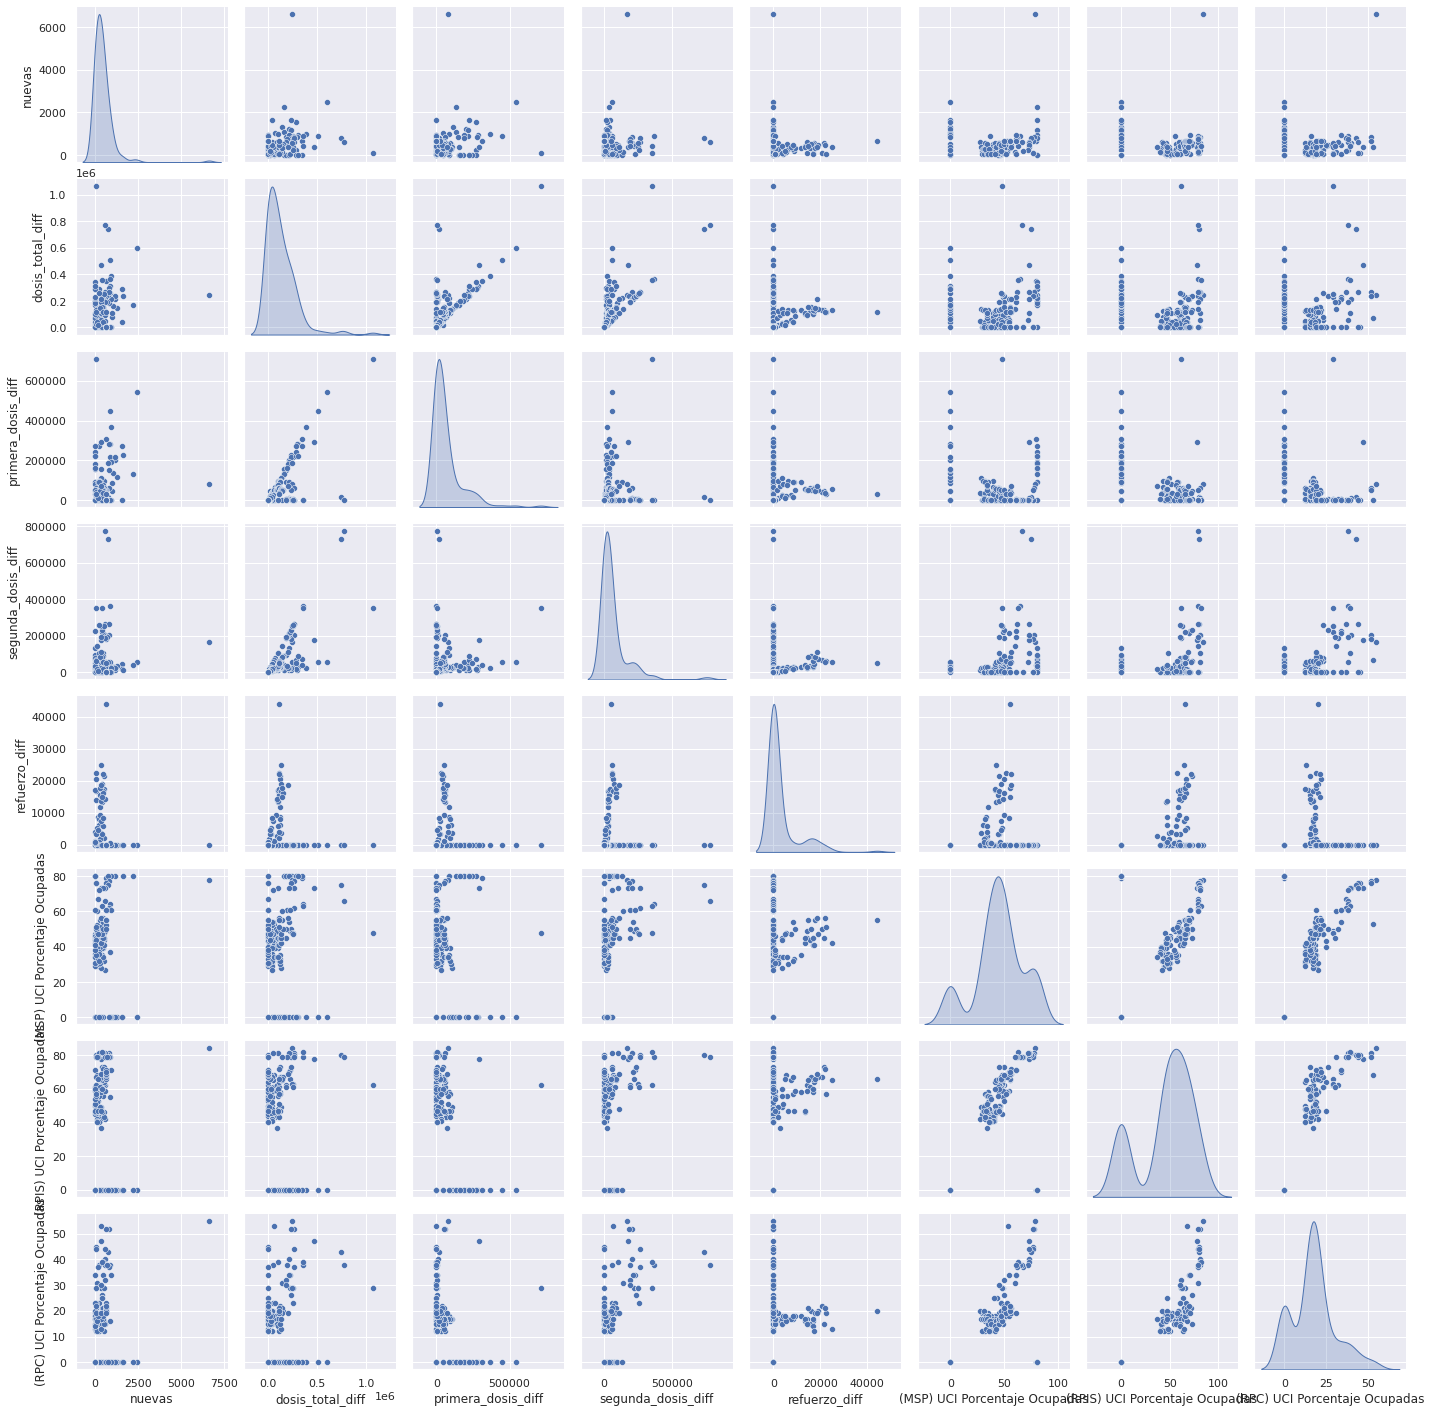

In [ ]:
sns.pairplot(df_icu_unified, diag_kind='kde')

<AxesSubplot:>

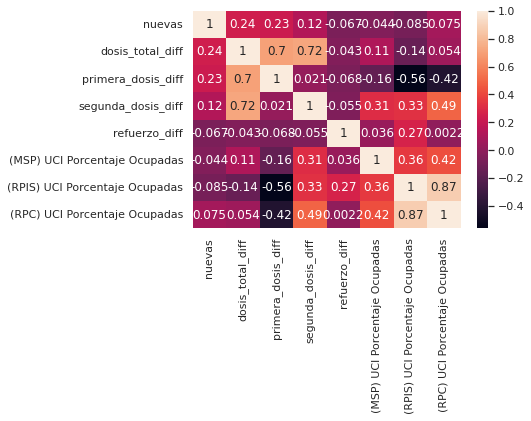

In [ ]:
sns.heatmap(df_icu_unified.corr(), annot=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=298bb443-d8b3-4731-ae95-ca4418ea078f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>